In [1]:
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn as sns
%matplotlib inline

In [2]:
users = pd.read_csv('takehome_users.csv',encoding = 'latin-1')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


###### Fixing binary data series if user is invited by friend or not

In [3]:
users.invited_by_user_id = users.invited_by_user_id.fillna(0)
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
def get_graph1():
    years=users.creation_time.astype(str).str.slice(0,4)
    x = years.unique()
    y = years.groupby(years).count()
    plt.figure(figsize=[8,5])
    sns.set()
    sns.barplot(x,y,color='blue')
    plt.text(x=1.5, y=4500, s= 'Total number \n of users:{}'.format(users.shape[0]),fontsize=18)

In [5]:
years=users.creation_time.astype(str).str.slice(0,4)
y = users.creation_source.groupby([users.creation_source,years]).count()
df =pd.DataFrame(y).unstack(level=0)
df

creation_source                                      \
creation_source    GUEST_INVITE ORG_INVITE PERSONAL_PROJECTS SIGNUP   
creation_time                                                         
2012                        540        948               519    470   
2013                        981       2021              1033    997   
2014                        642       1285               559    620   

                                    
creation_source SIGNUP_GOOGLE_AUTH  
creation_time                       
2012                           320  
2013                           644  
2014                           421

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


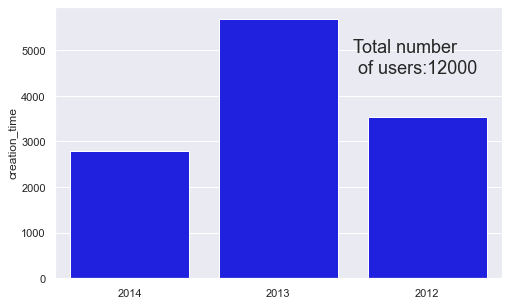

In [6]:
get_graph1()

In [7]:
def get_graph2():
    f, a = plt.subplots(1,3)
    plt.figure(figsize=[10,20])
    df.xs('2012').plot(kind='bar',ax=a[0],figsize=(10,6), color='red',title=2012)
    df.xs('2013').plot(kind='bar',ax=a[1],figsize=(10,6),color='yellow',title=2013)
    df.xs('2014').plot(kind='bar',ax=a[2],figsize=(10,6),color='green',title=2014)
    plt.tight_layout()

In [8]:
users.corr(method ='pearson')

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,1.000000,0.015238,-0.032370,-0.022040,0.004110,0.001657
last_session_creation_time,0.015238,1.000000,0.006590,0.008035,0.042203,0.009387
opted_in_to_mailing_list,-0.032370,0.006590,1.000000,0.483529,0.003432,0.007536
enabled_for_marketing_drip,-0.022040,0.008035,0.483529,1.000000,0.009275,0.003431
org_id,0.004110,0.042203,0.003432,0.009275,1.000000,-0.040868
invited_by_user_id,0.001657,0.009387,0.007536,0.003431,-0.040868,1.000000


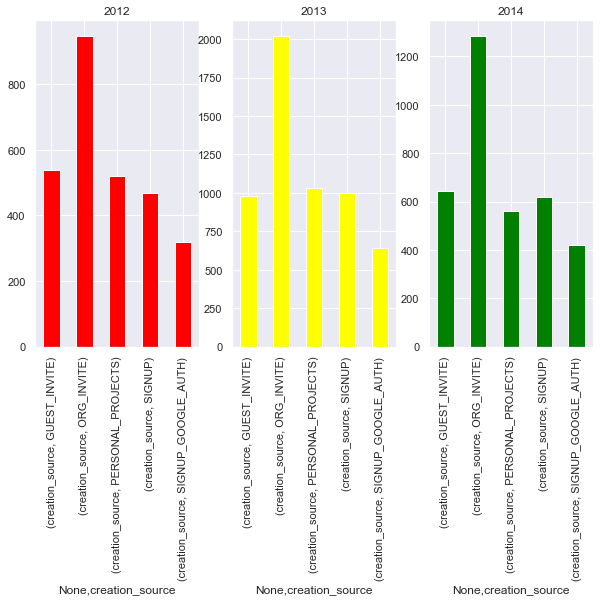

<Figure size 720x1440 with 0 Axes>

In [9]:
get_graph2()

In [13]:
def get_graph4():
    x=users.last_session_creation_time[users.last_session_creation_time.isnull()].shape[0]
    y=users.shape[0]-x
    plt.figure(figsize=[5,5])
    plt.pie([x/users.shape[0],y/users.shape[0]], explode=(0,0.1), autopct='%1.1f%%',colors='greys',
            shadow=True, startangle=90, labels= ('Inactive', 'Active Users'))

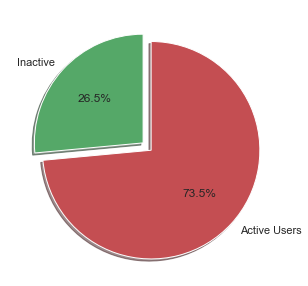

In [14]:
get_graph4()

In [15]:
user_en = pd.read_csv('takehome_user_engagement.csv')
user_en.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [16]:
user_en['time_stamp']=pd.to_datetime(user_en['time_stamp'])

In [17]:
user_en['visits_7_days'] = user_en.groupby('user_id', as_index=False, group_keys=False).apply(lambda x:x.rolling('7D',on='time_stamp')['user_id'].count())
user_en.head(5)

,time_stamp,user_id,visited,visits_7_days
0,2014-04-22 03:53:30,1,1,1.0
1,2013-11-15 03:45:04,2,1,1.0
2,2013-11-29 03:45:04,2,1,1.0
3,2013-12-09 03:45:04,2,1,1.0
4,2013-12-25 03:45:04,2,1,1.0


In [18]:
user_en.drop_duplicates('user_id', keep = 'first')
user_en.shape

(207917, 4)

In [19]:
adopted_users = user_en[user_en['visits_7_days']>=3]

adopted_users = adopted_users.drop_duplicates('user_id', keep = 'first')

len(adopted_users)

1602

In [20]:
aadopted_users_list = adopted_users.user_id.tolist()

In [21]:
users=users[users.object_id.isin(aadopted_users_list)]
len(users)

1602

In [24]:
user_en.drop(['visited'],axis=1, inplace=True)

KeyError: "['visited'] not found in axis"

In [25]:
users.shape

(1602, 10)